# Assignment 2 Question 3

#### Importing the libraries

In [61]:
import sklearn # import sklearn for building the classifier
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt # import matplotlib since I am going to build some plots 

Set the data file name to be a constant

In [52]:
DATAFILE = "A2Q2.csv"

#### Loading the dataset from file

In [67]:
df = pd.read_csv(DATAFILE, header=None, index_col=False)
data = df.values[:,1:]
results = df.values[:,0]
X_train, X_test, y_train, y_test = train_test_split(data, results, test_size=0.33)

Calculate the f1-scores for Naive Bayes Classifier, KNN Classifier and Decision Tree Classifier

In [68]:
gnbc = GaussianNB() # gnbc stands for gaussian naive bayes classifer
knnc = KNeighborsClassifier(n_neighbors=3) # I have chosen K to be 3
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
gnbc.fit(X_train, y_train)
knnc.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
accuracies = [
    f1_score(y_test, gnbc.predict(X_test), average='micro'), 
    f1_score(y_test, knnc.predict(X_test), average='micro'),
    f1_score(y_test, decision_tree_classifier.predict(X_test), average='micro')]

Build the plots, representing the f1-score for each of the classifiers

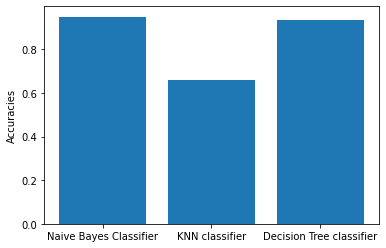

0.9491525423728814	0.6610169491525424	0.9322033898305084


In [69]:
x = range(len(accuracies))
plt.bar(x, height=accuracies)
plt.xticks(x, ['Naive Bayes Classifier', 'KNN classifier', 'Decision Tree classifier'])
plt.ylabel('Accuracies')
plt.show()
print(*accuracies, sep='\t')


### Classifiers' performance analysis

#### KNN classifier

From the above plot, we can clearly see that KNN has the worst performance amongst all three classifiers. This happens because the dataset has 13 elements and KNN cannot handle such a number of dimensions as good, as it can handle 2,3, or 5 dimensions. In a 13-dimensional space the distances between neighbors become very similar and therefore it is hard to distinguish the closest and far neighbors.

#### Decision tree classifier

From the above plot we can also observe that the decision tree classifier has the second best performance. The reason for this is that when selecting a feature to be splitted, dt chooses the best one and ignores the other best feature. Hence it might lose a certain amount of information, while categorizing features.

#### Naive Bayes Classifier

On the plot above it is shown that Naive Bayes classifier gives the highest performance amogst all. The explaination for it is that this classifier expects all elements to be free from one another. It works astonishingly well on small datasets like this one and therefore I would choose it, if I were to choose one classifier. 